In [1]:
import numpy as np
import sympy as sp
import copy
import matplotlib.pyplot as plt
import math
from sympy.solvers import solve

In [2]:
x = sp.symbols('x')
y = sp.symbols('y')

In [70]:
m, a = 1.5, 0.9
eq=a*(1-y**2)/((1+m)*x**2 + y**2 + 1)

In [8]:
eq=-y
eq

-y

# Реализация

In [98]:
def Eyler_gen(eq, y_0):
    acc=0.001
    # h = (1 - 0) / 10
    h=0.00078125
    x_vals = np.arange(0, 1+0.000000001, h)
    y_vals=[y_0,]
    for i in range(len(x_vals)-1):
        y_vals.append(y_vals[i]+h*eq.subs([(x,x_vals[i]),(y,y_vals[i])]))

    return x_vals,y_vals,h

In [99]:
x_vals,y_vals,h=Eyler_gen(eq,0)

In [72]:
h,1/h

(0.00078125, 1280.0)

In [100]:
d={str(round(x_val,10)):y_val for x_val,y_val in zip(x_vals,y_vals)}

In [81]:
def Adams_explicit(eq, y_0, d):
    acc=0.001
    h=0.1
    x_vals = np.arange(0, 1+0.0000000001, h)
    y_vals=[]
    y_vals.append(y_0)
    y_vals.append(d[str(h)])
    # print(d[str(h)])
    for i in range(len(x_vals)-2):
        y_vals.append(y_vals[i+1]+h*((3/2)*eq.subs([(x,x_vals[i+1]),(y,y_vals[i+1])])-(1/2)*eq.subs([(x,x_vals[i]),(y,y_vals[i])])))
    # print(f"{len(x_vals)}  {len(y_vals)}\n\n")

    h_new=h
    k=2
    flag=1
    iter=0
    num=0
    while(flag==1):
        flag=0

        h_new=h_new/2

        y_vals_new=[]
        y_vals_new.append(y_0)
        y_vals_new.append(d[str(h_new)])

        x_vals_news = np.arange(0, 1+0.00000000001, h_new)
        for i in range(len(x_vals_news)-2):
            y_vals_new.append(y_vals_new[i+1]+h_new*((3/2)*eq.subs([(x,x_vals_news[i+1]),(y,y_vals_new[i+1])])-(1/2)*eq.subs([(x,x_vals_news[i]),(y,y_vals_new[i])])))
        # print(f"{len(x_vals_news)}  {len(y_vals_new)}\n\n")
        vals=[]
        # print(x_vals_news)
        # print(y_vals_new)
        for i in range(0,len(x_vals_news),2):
            vals.append(y_vals_new[i])
        falls=0

        # if iter==0:
        #     y_vals_prev=[]

        if iter==0:
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals[i])>acc):
                    #print(abs(vals[i]-y_vals[i]))
                    flag=1
                    break
                    # falls+=1
                              
        else:
            # print(len(vals))
            # print(len(y_vals_prev))
            # print(iter)
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals_prev[i])>acc):
                    flag=1
                    # print(abs(vals[i]-y_vals[i]))
                    # print(iter)
                    break
        #             falls+=1
        # coef=1-falls/len(vals)
        # print(coef)
        # if flag==1 and coef>0.5:
        #     return x_vals_prev,y_vals_prev,h_new*2

        if flag==1:
            y_vals_prev = y_vals_new
            h_prev = h_new
            x_vals_prev = x_vals_news

        if iter==0 and flag==0:
            return x_vals,y_vals,h    
        iter+=1    

    return x_vals_prev,y_vals_prev,h_new*2

In [ ]:
x_vals_ada,y_vals_ada,h_ada=Adams_explicit(eq,0,d)

In [ ]:
h_ada,1/h_ada

(0.05, 20.0)

In [ ]:
for x_val,y_val in zip(x_vals_ada,y_vals_ada):
    print(f"{round(x_val,4)} {round(y_val,4)}")

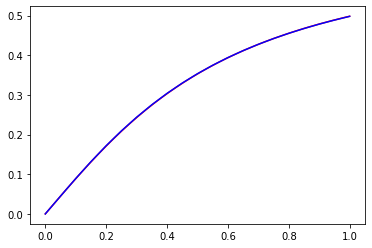

In [ ]:
plt.Figure(figsize=(10,10))
plt.plot(x_vals,y_vals,color="r")
plt.plot(x_vals_ada,y_vals_ada,color="b")
plt.show()

In [82]:
def Adams_implicit(eq, y_0, d):
    acc=0.001
    h=0.1
    x_vals = np.arange(0, 1+0.0000000001, h)
    y_vals=[]
    y_vals.append(y_0)
    for i in range(len(x_vals)-1):
        y_vals.append(solve(y_vals[i]+h*(0.5*eq.subs([(x,x_vals[i+1])])+0.5*eq.subs([(x,x_vals[i]),(y,y_vals[i])]))-y,y)[0])

    h_new=h
    k=2
    flag=1
    iter=0
    num=0
    while(flag==1):
        flag=0

        h_new=h_new/2

        y_vals_new=[]
        y_vals_new.append(y_0)
        # print('Hello')
        x_vals_news = np.arange(0, 1+0.00000000001, h_new)
        for i in range(len(x_vals_news)-1):
            y_vals_new.append(solve(y_vals_new[i]+h_new*(0.5*eq.subs([(x,x_vals_news[i+1])])+0.5*eq.subs([(x,x_vals_news[i]),(y,y_vals_new[i])]))-y,y)[0])        # print(f"{len(x_vals_news)}  {len(y_vals_new)}\n\n")
        vals=[]
        # print('Hello')
        # print(x_vals_news)
        # print(y_vals_new)
        for i in range(0,len(x_vals_news),2):
            vals.append(y_vals_new[i])
        falls=0
        # print('Hello')
        # if iter==0:
        #     y_vals_prev=[]

        if iter==0:
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals[i])>acc):
                    #print(abs(vals[i]-y_vals[i]))
                    flag=1
                    break
                    # falls+=1
                              
        else:
            # print(len(vals))
            # print(len(y_vals_prev))
            # print(iter)
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals_prev[i])>acc):
                    flag=1
                    # print(abs(vals[i]-y_vals[i]))
                    # print(iter)
                    break
        #             falls+=1
        # coef=1-falls/len(vals)
        # print(coef)
        # if flag==1 and coef>0.5:
        #     return x_vals_prev,y_vals_prev,h_new*2
        # print('Hello')
        if flag==1:
            y_vals_prev = y_vals_new
            h_prev = h_new
            x_vals_prev = x_vals_news

        if iter==0 and flag==0:
            return x_vals,y_vals,h    
        iter+=1    

    return x_vals_prev,y_vals_prev,h_new*2

In [ ]:
d['0.1']

0.0888092528616345

In [ ]:
eq.subs([(x,0.1)])

(0.9 - 0.9*y**2)/(y**2 + 1.025)

In [ ]:
eq.subs([(x,0),(y,0)])

0.900000000000000

In [ ]:
solve(x-2, x)

[2]

In [ ]:
solve(0+0.1*(0.5*eq.subs([(x,0.1)])+0.5*eq.subs([(x,0),(y,0)]))-y,y)

[0.0882323090117922,
 -0.0441161545058961 - 1.01530227285531*I,
 -0.0441161545058961 + 1.01530227285531*I]

In [ ]:
x_vals_ada,y_vals_ada,h_ada=Adams_implicit(eq,0,d)

In [ ]:
h_ada,1/h_ada

(0.1, 10.0)

In [ ]:
for x_val,y_val in zip(x_vals_ada,y_vals_ada):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 0
0.1 0.0882
0.2 0.1702
0.3 0.2419
0.4 0.3023
0.5 0.3523
0.6 0.3933
0.7 0.4271
0.8 0.4551
0.9 0.4785
1.0 0.4982


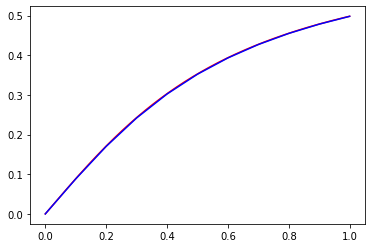

In [ ]:
plt.Figure(figsize=(10,10))
plt.plot(x_vals,y_vals,color="r")
plt.plot(x_vals_ada,y_vals_ada,color="b")
plt.show()

In [112]:
def Adams_implicit_k1(eq, y_0, d):
    acc=0.01
    h=0.1
    x_vals = np.arange(0, 1+0.0000000001, h)
    y_vals=[]
    y_vals.append(y_0)
    for i in range(len(x_vals)-1):
        y_vals.append(solve(y_vals[i]+h*(eq.subs([(x,x_vals[i+1])]))-y,y)[0])

    h_new=h
    k=2
    flag=1
    iter=0
    num=0
    while(flag==1):
        flag=0

        h_new=h_new/2

        y_vals_new=[]
        y_vals_new.append(y_0)
        # print('Hello')
        x_vals_news = np.arange(0, 1+0.00000000001, h_new)
        for i in range(len(x_vals_news)-1):
            y_vals_new.append(solve(y_vals_new[i]+h_new*(eq.subs([(x,x_vals_news[i+1])]))-y,y)[0])        # print(f"{len(x_vals_news)}  {len(y_vals_new)}\n\n")
        vals=[]
        # print('Hello')
        # print(x_vals_news)
        # print(y_vals_new)
        for i in range(0,len(x_vals_news),2):
            vals.append(y_vals_new[i])
        falls=0
        # print('Hello')
        # if iter==0:
        #     y_vals_prev=[]

        if iter==0:
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals[i])>acc):
                    #print(abs(vals[i]-y_vals[i]))
                    flag=1
                    break
                    # falls+=1
                              
        else:
            # print(len(vals))
            # print(len(y_vals_prev))
            # print(iter)
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals_prev[i])>acc):
                    flag=1
                    # print(abs(vals[i]-y_vals[i]))
                    # print(iter)
                    break
        #             falls+=1
        # coef=1-falls/len(vals)
        # print(coef)
        # if flag==1 and coef>0.5:
        #     return x_vals_prev,y_vals_prev,h_new*2
        # print('Hello')
        if flag==1:
            y_vals_prev = y_vals_new
            h_prev = h_new
            x_vals_prev = x_vals_news

        if iter==0 and flag==0:
            return x_vals,y_vals,h    
        iter+=1    

    return x_vals_prev,y_vals_prev,h_new*2

In [84]:
def Adams_implicit_k3(eq, y_0, d):
    acc=0.001
    h=0.1
    x_vals = np.arange(0, 1+0.0000000001, h)
    y_vals=[]
    y_vals.append(y_0)
    y_vals.append(d[str(h)])
    for i in range(len(x_vals)-2):
        y_vals.append(solve(y_vals[i+1]+h*((5/12)*eq.subs([(x,x_vals[i+2])])+(8/12)*eq.subs([(x,x_vals[i+1]),(y,y_vals[i+1])])-(1/12)*eq.subs([(x,x_vals[i]),(y,y_vals[i])]))-y,y)[0])

    h_new=h
    k=2
    flag=1
    iter=0
    num=0
    while(flag==1):
        flag=0

        h_new=h_new/2

        y_vals_new=[]
        y_vals_new.append(y_0)
        y_vals_new.append(d[str(h_new)])
        # print('Hello')
        x_vals_news = np.arange(0, 1+0.00000000001, h_new)
        for i in range(len(x_vals_news)-2):
            y_vals_new.append(solve(y_vals_new[i+1]+h_new*((5/12)*eq.subs([(x,x_vals_news[i+2])])+(8/12)*eq.subs([(x,x_vals_news[i+1]),(y,y_vals_new[i+1])])-(1/12)*eq.subs([(x,x_vals_news[i]),(y,y_vals_new[i])]))-y,y)[0])
        vals=[]
        # print('Hello')
        # print(x_vals_news)
        # print(y_vals_new)
        for i in range(0,len(x_vals_news),2):
            vals.append(y_vals_new[i])
        falls=0
        # print('Hello')
        # if iter==0:
        #     y_vals_prev=[]

        if iter==0:
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals[i])>acc):
                    #print(abs(vals[i]-y_vals[i]))
                    flag=1
                    break
                    # falls+=1
                              
        else:
            # print(len(vals))
            # print(len(y_vals_prev))
            # print(iter)
            for i in range(len(vals)):
                if(abs(vals[i]-y_vals_prev[i])>acc):
                    flag=1
                    # print(abs(vals[i]-y_vals[i]))
                    # print(iter)
                    break
        #             falls+=1
        # coef=1-falls/len(vals)
        # print(coef)
        # if flag==1 and coef>0.5:
        #     return x_vals_prev,y_vals_prev,h_new*2
        # print('Hello')
        if flag==1:
            y_vals_prev = y_vals_new
            h_prev = h_new
            x_vals_prev = x_vals_news

        if iter==0 and flag==0:
            return x_vals,y_vals,h    
        iter+=1    

    return x_vals_prev,y_vals_prev,h_new*2

# Тестовый пример

In [3]:
h=0.1
x_vals_sol = np.arange(0, 1+0.000001, h)
y_vals_sol=[np.exp(-i) for i in x_vals_sol]

In [4]:
for x_val,y_val in zip(x_vals_sol,y_vals_sol):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 1.0
0.1 0.9048
0.2 0.8187
0.3 0.7408
0.4 0.6703
0.5 0.6065
0.6 0.5488
0.7 0.4966
0.8 0.4493
0.9 0.4066
1.0 0.3679


In [15]:
eq

-y

In [38]:
x_vals_ada_explicit,y_vals_ada_explicit,h_ada_explicit=Adams_explicit(eq,1,d)

In [39]:
h_ada_explicit,1/h_ada_explicit

(0.1, 10.0)

In [40]:
for x_val,y_val in zip(x_vals_ada_explicit,y_vals_ada_explicit):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 1
0.1 0.9048
0.2 0.8191
0.3 0.7415
0.4 0.6712
0.5 0.6076
0.6 0.5500
0.7 0.4979
0.8 0.4507
0.9 0.4080
1.0 0.3693


In [43]:
x_vals_ada_implicit,y_vals_ada_implicit,h_ada_implicit=Adams_implicit(eq,1,d)

In [45]:
h_ada_implicit,1/h_ada_implicit

(0.1, 10.0)

In [46]:
for x_val,y_val in zip(x_vals_ada_implicit,y_vals_ada_implicit):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 1
0.1 0.9048
0.2 0.8186
0.3 0.7406
0.4 0.6701
0.5 0.6063
0.6 0.5485
0.7 0.4963
0.8 0.4490
0.9 0.4063
1.0 0.3676


In [53]:
x_vals_ada_implicit_k1,y_vals_ada_implicit_k1,h_ada_implicit_k1=Adams_implicit_k1(eq,1,d)

In [54]:
h_ada_implicit_k1,1/h_ada_implicit_k1

(0.1, 10.0)

In [55]:
for x_val,y_val in zip(x_vals_ada_implicit_k1,y_vals_ada_implicit_k1):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 1
0.1 0.9091
0.2 0.8264
0.3 0.7513
0.4 0.6830
0.5 0.6209
0.6 0.5645
0.7 0.5132
0.8 0.4665
0.9 0.4241
1.0 0.3855


In [64]:
x_vals_ada_implicit_k3,y_vals_ada_implicit_k3,h_ada_implicit_k3=Adams_implicit_k3(eq,1,d)

In [67]:
h_ada_implicit_k3,1/h_ada_implicit_k3

(0.1, 10.0)

In [68]:
for x_val,y_val in zip(x_vals_ada_implicit_k3,y_vals_ada_implicit_k3):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 1
0.1 0.9048
0.2 0.8187
0.3 0.7408
0.4 0.6703
0.5 0.6065
0.6 0.5488
0.7 0.4966
0.8 0.4493
0.9 0.4066
1.0 0.3679


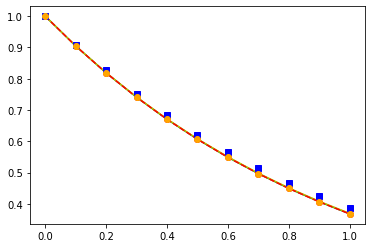

In [69]:
plt.Figure(figsize=(20,20))
plt.plot(x_vals_sol,y_vals_sol,color="g")
plt.plot(x_vals_ada_explicit,y_vals_ada_explicit,color="y")
plt.plot(x_vals_ada_implicit,y_vals_ada_implicit,'go--',color="r")
plt.plot(x_vals_ada_implicit_k1,y_vals_ada_implicit_k1,"rs",color="b")
plt.plot(x_vals_ada_implicit_k3,y_vals_ada_implicit_k3,"o",color="orange")
plt.show()

# Вариант 8

In [101]:
eq

(0.9 - 0.9*y**2)/(2.5*x**2 + y**2 + 1)

In [102]:
x_vals_ada_explicit,y_vals_ada_explicit,h_ada_explicit=Adams_explicit(eq,0,d)

In [103]:
h_ada_explicit,1/h_ada_explicit

(0.05, 20.0)

In [104]:
for x_val,y_val in zip(x_vals_ada_explicit,y_vals_ada_explicit):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 0
0.05 0.0449
0.1 0.0892
0.15 0.1317
0.2 0.1719
0.25 0.2093
0.3 0.2437
0.35 0.2752
0.4 0.3039
0.45 0.3299
0.5 0.3535
0.55 0.3748
0.6 0.3942
0.65 0.4117
0.7 0.4276
0.75 0.4421
0.8 0.4554
0.85 0.4675
0.9 0.4786
0.95 0.4887
1.0 0.4981


In [124]:
for i in range(0,len(x_vals_ada_explicit),2):
    print(f"{round(x_vals_ada_explicit[i],4)} {round(y_vals_ada_explicit[i],4)}")

0.0 0
0.1 0.0892
0.2 0.1719
0.3 0.2437
0.4 0.3039
0.5 0.3535
0.6 0.3942
0.7 0.4276
0.8 0.4554
0.9 0.4786
1.0 0.4981


In [105]:
x_vals_ada_implicit,y_vals_ada_implicit,h_ada_implicit=Adams_implicit(eq,0,d)

In [106]:
h_ada_implicit,1/h_ada_implicit

(0.1, 10.0)

In [107]:
for x_val,y_val in zip(x_vals_ada_implicit,y_vals_ada_implicit):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 0
0.1 0.0882
0.2 0.1702
0.3 0.2419
0.4 0.3023
0.5 0.3523
0.6 0.3933
0.7 0.4271
0.8 0.4551
0.9 0.4785
1.0 0.4982


In [113]:
x_vals_ada_implicit_k1,y_vals_ada_implicit_k1,h_ada_implicit_k1=Adams_implicit_k1(eq,0,d)

In [114]:
h_ada_implicit_k1,1/h_ada_implicit_k1

(0.05, 20.0)

In [115]:
for x_val,y_val in zip(x_vals_ada_implicit_k1,y_vals_ada_implicit_k1):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 0
0.05 0.0445
0.1 0.0878
0.15 0.1290
0.2 0.1678
0.25 0.2038
0.3 0.2370
0.35 0.2673
0.4 0.2949
0.45 0.3200
0.5 0.3428
0.55 0.3635
0.6 0.3823
0.65 0.3993
0.7 0.4149
0.75 0.4291
0.8 0.4420
0.85 0.4539
0.9 0.4648
0.95 0.4748
1.0 0.4840


In [125]:
for i in range(0,len(x_vals_ada_implicit_k1),2):
    print(f"{round(x_vals_ada_implicit_k1[i],4)} {round(y_vals_ada_implicit_k1[i],4)}")

0.0 0
0.1 0.0878
0.2 0.1678
0.3 0.2370
0.4 0.2949
0.5 0.3428
0.6 0.3823
0.7 0.4149
0.8 0.4420
0.9 0.4648
1.0 0.4840


In [109]:
x_vals_ada_implicit_k3,y_vals_ada_implicit_k3,h_ada_implicit_k3=Adams_implicit_k3(eq,0,d)

In [110]:
h_ada_implicit_k3,1/h_ada_implicit_k3

(0.1, 10.0)

In [111]:
for x_val,y_val in zip(x_vals_ada_implicit_k3,y_vals_ada_implicit_k3):
    print(f"{round(x_val,4)} {round(y_val,4)}")

0.0 0
0.1 0.0888
0.2 0.1712
0.3 0.2430
0.4 0.3034
0.5 0.3531
0.6 0.3940
0.7 0.4276
0.8 0.4555
0.9 0.4788
1.0 0.4984


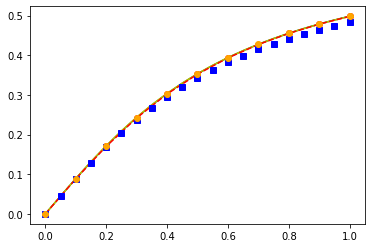

In [116]:
plt.Figure(figsize=(20,20))
plt.plot(x_vals,y_vals,color="g")
plt.plot(x_vals_ada_explicit,y_vals_ada_explicit,color="y")
plt.plot(x_vals_ada_implicit,y_vals_ada_implicit,'go--',color="r")
plt.plot(x_vals_ada_implicit_k1,y_vals_ada_implicit_k1,"rs",color="b")
plt.plot(x_vals_ada_implicit_k3,y_vals_ada_implicit_k3,"o",color="orange")
plt.show()